In [5]:
import networkx as nx
import pandas as pd

data = pd.read_csv("../Datasets/Dataset.csv")


{('campaign_item_id_2733',
  'advertiser_id_4756'): Text(-0.20425651198837103, -0.45051728174697003, 'related_to'),
 ('campaign_item_id_2733',
  'creative_id_1000'): Text(0.4593360774236863, 0.07721686257911431, 'uses_creative'),
 ('campaign_item_id_2766',
  'advertiser_id_5191'): Text(0.4945087308272924, -0.0017524840828531119, 'related_to'),
 ('campaign_item_id_2766',
  'creative_id_1005'): Text(-0.2969978954741417, -0.3691845682057111, 'uses_creative'),
 ('campaign_item_id_2766',
  'creative_id_1010'): Text(-0.11892025846497156, 0.46055805617338574, 'uses_creative'),
 ('campaign_item_id_2766',
  'creative_id_1015'): Text(-0.4404988431791179, 0.22678191470534736, 'uses_creative'),
 ('campaign_item_id_2766',
  'creative_id_1020'): Text(-0.3928163401247695, 0.35990357705093445, 'uses_creative'),
 ('campaign_item_id_2766',
  'creative_id_1025'): Text(0.319298160563408, -0.23748893004673932, 'uses_creative'),
 ('campaign_item_id_2766',
  'creative_id_1030'): Text(-0.42905672803335837, -0

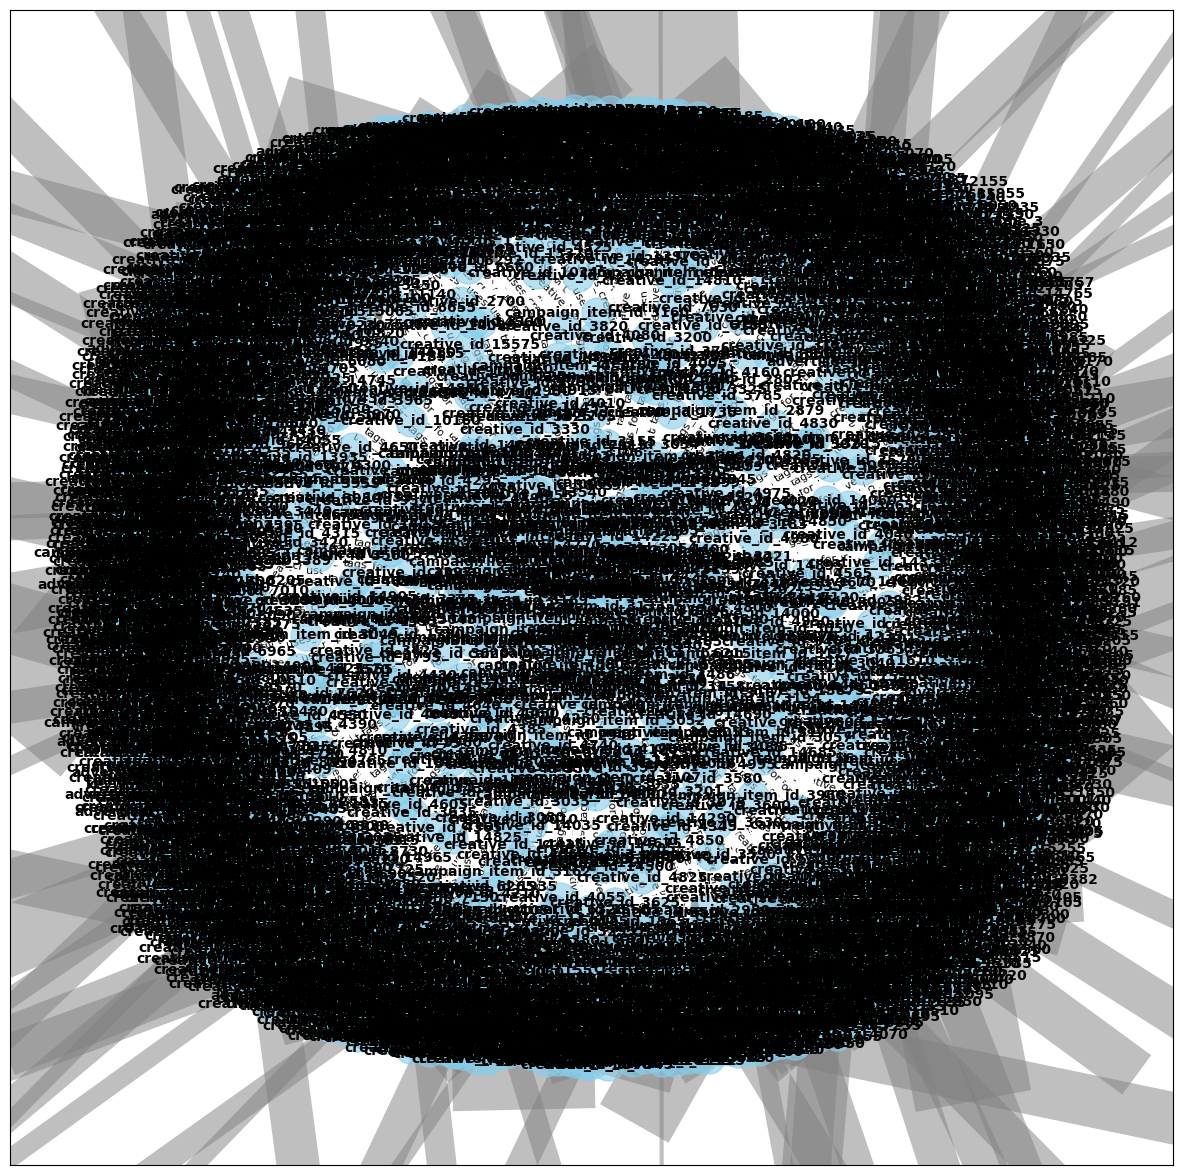

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a graph
G = nx.Graph()

# Step 1: Add nodes for each unique value in categorical columns
node_types = ['campaign_item_id', 'advertiser_id', 'ext_service_name', 'creative_id', 
              'search_tags', 'template_id', 'channel_name', 'keywords']

# Adding nodes for each unique value in the categorical column
for col in node_types:
    for value in data[col].unique():
        G.add_node(f"{col}_{value}", type=col)

# Step 2: Add edges based on the relationships
for index, row in data.iterrows():
    # Create edges based on your relationships
    G.add_edge(f"campaign_item_id_{row['campaign_item_id']}", f"advertiser_id_{row['advertiser_id']}", relationship="related_to")
    G.add_edge(f"creative_id_{row['creative_id']}", f"search_tags_{row['search_tags']}", relationship="tags_for")
    G.add_edge(f"ext_service_name_{row['ext_service_name']}", f"channel_name_{row['channel_name']}", relationship="associated_with")
    G.add_edge(f"campaign_item_id_{row['campaign_item_id']}", f"creative_id_{row['creative_id']}", relationship="uses_creative")
    # Add more edges with custom relationships if needed

# weighted edges based on numerical data like 'media_cost_usd', 'impressions', 'clicks'
for index, row in data.iterrows():
    G.add_edge(f"campaign_item_id_{row['campaign_item_id']}", f"ext_service_name_{row['ext_service_name']}", weight=row['media_cost_usd'])
    G.add_edge(f"campaign_item_id_{row['campaign_item_id']}", f"creative_id_{row['creative_id']}", weight=row['impressions'])
    G.add_edge(f"campaign_item_id_{row['campaign_item_id']}", f"creative_id_{row['creative_id']}", weight=row['clicks'])

# Step 3: Visualize the graph (optional)
# Visualize the graph (you can adjust the layout and other properties as needed)
plt.figure(figsize=(15, 15))

# Adjust layout for better visibility
pos = nx.spring_layout(G, k=0.5, iterations=20)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue', alpha=0.6)

# Draw labels for nodes
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edges with custom width and alpha for better visibility
edges = G.edges()
weights = [G[u][v].get('weight', 1) for u, v in edges]  # Get edge weights if available
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5, edge_color='gray')

# Add edge labels for relationships
edge_labels = nx.get_edge_attributes(G, 'relationship')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)




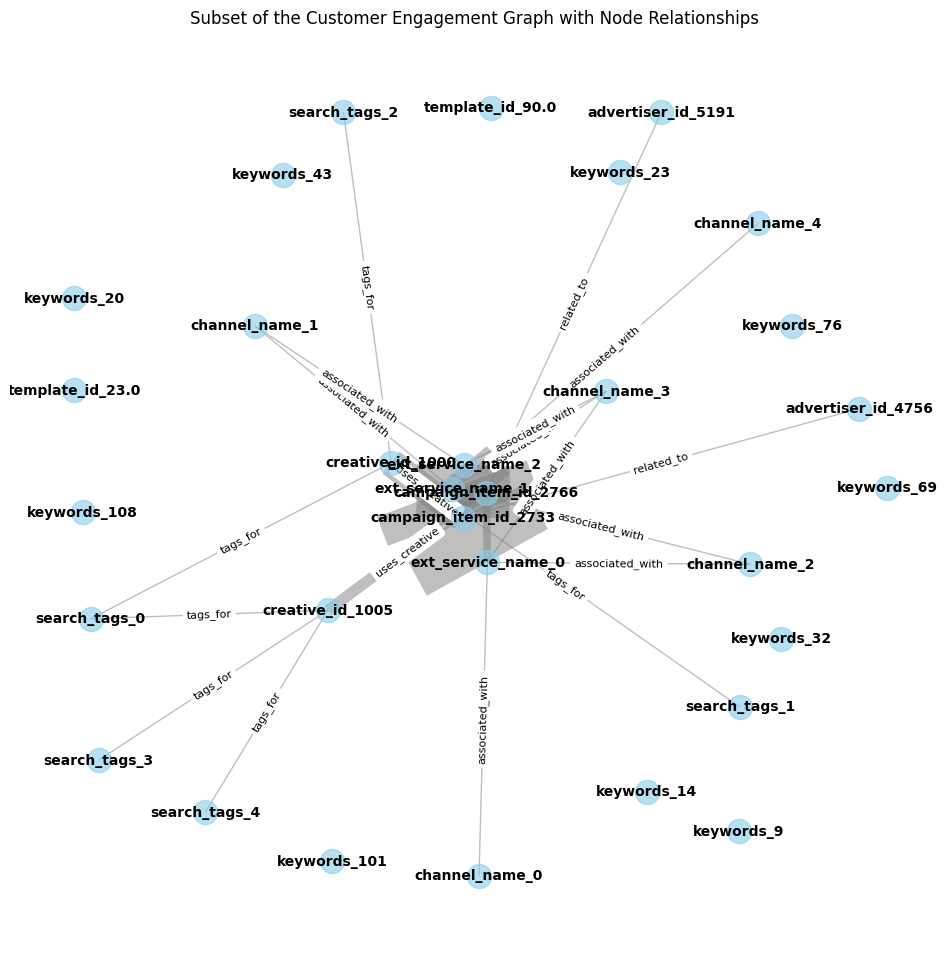

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Select a subset of the graph (for example, only the first 10 rows for visualization)
subset_data = data.head(10)

# Initialize a smaller graph
G_subset = nx.Graph()

# Step 1: Add nodes for each unique value in categorical columns
node_types = ['campaign_item_id', 'advertiser_id', 'ext_service_name', 'creative_id', 
              'search_tags', 'template_id', 'channel_name', 'keywords']

# Add nodes for the subset data
for col in node_types:
    for value in subset_data[col].unique():
        G_subset.add_node(f"{col}_{value}", type=col)

# Step 2: Add edges based on the relationships in the subset
for index, row in subset_data.iterrows():
    G_subset.add_edge(f"campaign_item_id_{row['campaign_item_id']}", f"advertiser_id_{row['advertiser_id']}", relationship="related_to")
    G_subset.add_edge(f"creative_id_{row['creative_id']}", f"search_tags_{row['search_tags']}", relationship="tags_for")
    G_subset.add_edge(f"ext_service_name_{row['ext_service_name']}", f"channel_name_{row['channel_name']}", relationship="associated_with")
    G_subset.add_edge(f"campaign_item_id_{row['campaign_item_id']}", f"creative_id_{row['creative_id']}", relationship="uses_creative")
    # Add more edges as needed

for index, row in subset_data.iterrows():
    G_subset.add_edge(f"campaign_item_id_{row['campaign_item_id']}", f"ext_service_name_{row['ext_service_name']}", weight=row['media_cost_usd'])
    G_subset.add_edge(f"campaign_item_id_{row['campaign_item_id']}", f"creative_id_{row['creative_id']}", weight=row['impressions'])
    G_subset.add_edge(f"campaign_item_id_{row['campaign_item_id']}", f"creative_id_{row['creative_id']}", weight=row['clicks'])

# Step 3: Visualize the subset graph with adjusted settings
plt.figure(figsize=(12, 12))

# Adjust node sizes, edge width based on weights, and layout
pos = nx.spring_layout(G_subset, k=0.5, iterations=20)  # Adjust layout for better visibility
edges = G_subset.edges()
weights = [G_subset[u][v].get('weight', 1) for u, v in edges]  # Edge weights based on numerical values

# Draw the nodes
nx.draw_networkx_nodes(G_subset, pos, node_size=300, node_color='skyblue', alpha=0.6)

# Draw the labels for nodes
nx.draw_networkx_labels(G_subset, pos, font_size=10, font_weight='bold')

# Draw the edges with weights (color and width based on the weight)
nx.draw_networkx_edges(G_subset, pos, width=weights, alpha=0.5, edge_color='gray')

# Add edge labels for relationships (show the 'relationship' attribute)
edge_labels = nx.get_edge_attributes(G_subset, 'relationship')
nx.draw_networkx_edge_labels(G_subset, pos, edge_labels=edge_labels, font_size=8)

plt.title("Subset of the Customer Engagement Graph with Node Relationships")
plt.axis('off')  # Hide axis for clarity
plt.show()
